<a href="https://colab.research.google.com/github/Molly-12/IOMP-/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_lables=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandle","Shirt","Sneakers","Bag","Ankle boot"]

In [ ]:
class_lables

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandle',
 'Shirt',
 'Sneakers',
 'Bag',
 'Ankle boot']

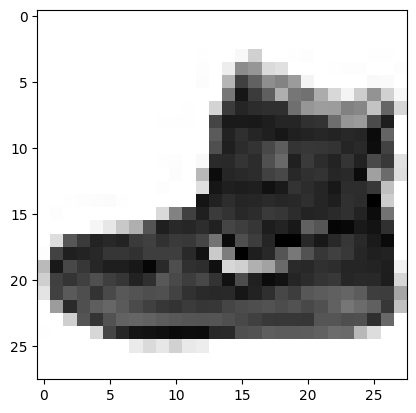

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

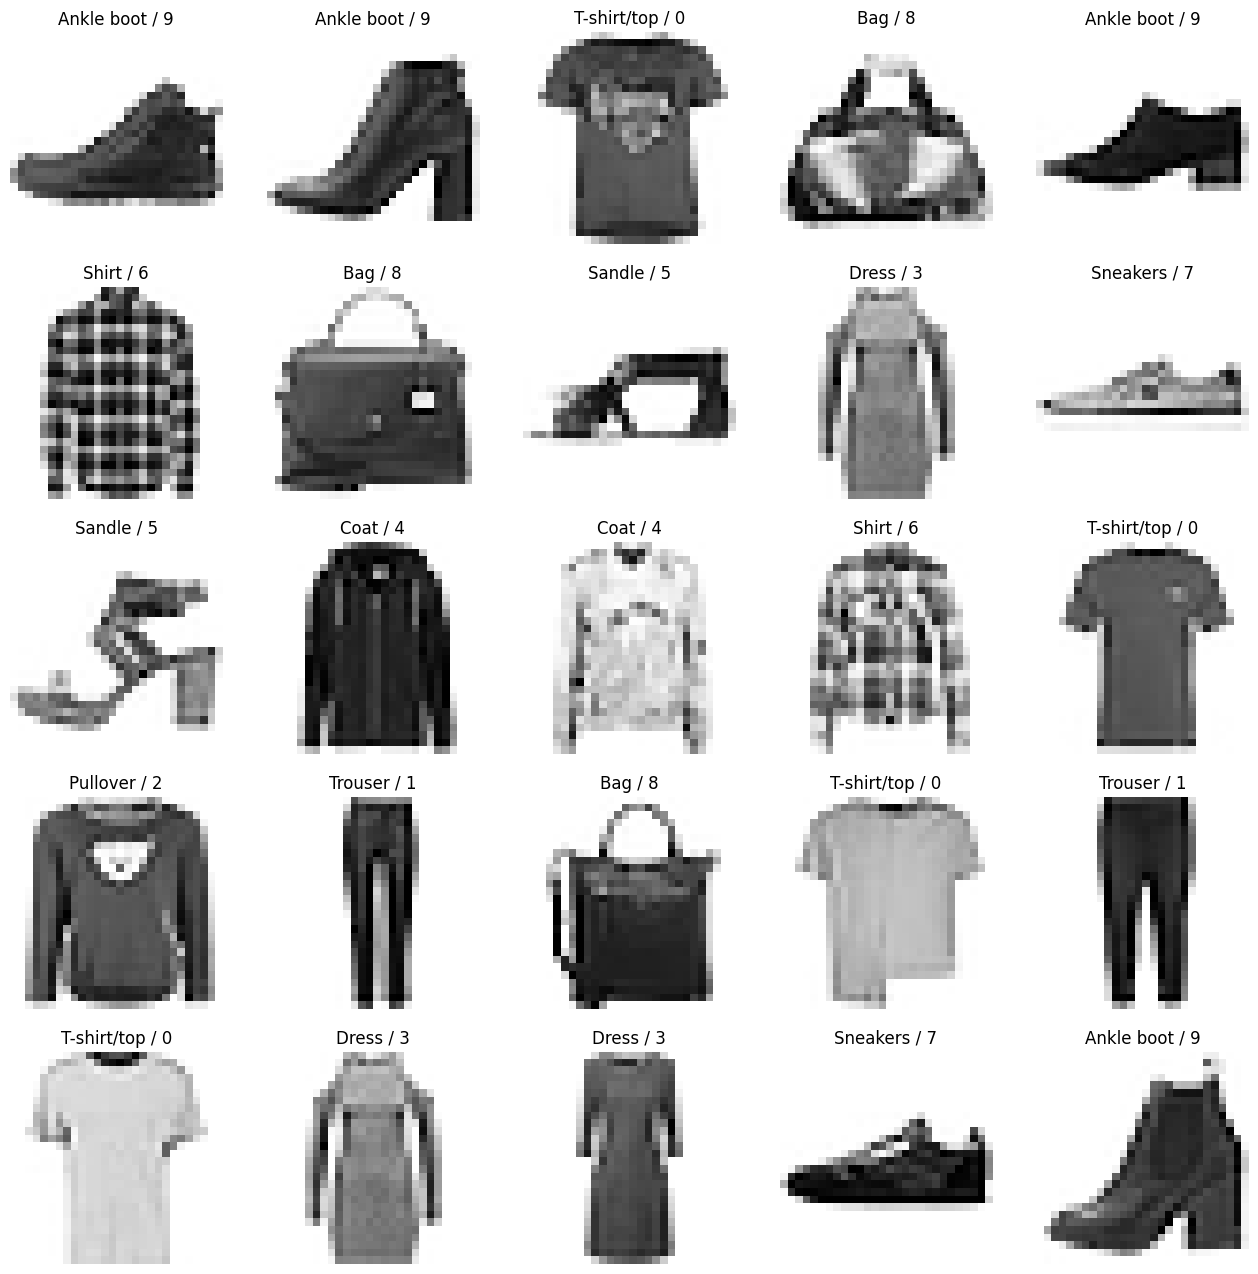

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_lables[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:

X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_train = X_train/255
X_test= X_test/255

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=4,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/20
94/94 [==============================] - 14s 20ms/step - loss: 0.6509 - accuracy: 0.7758 - val_loss: 0.4526 - val_accuracy: 0.8426
Epoch 2/20
94/94 [==============================] - 1s 14ms/step - loss: 0.4013 - accuracy: 0.8594 - val_loss: 0.3807 - val_accuracy: 0.8683
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3519 - accuracy: 0.8758 - val_loss: 0.3512 - val_accuracy: 0.8773
Epoch 4/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3206 - accuracy: 0.8866 - val_loss: 0.3303 - val_accuracy: 0.8844
Epoch 5/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2982 - accuracy: 0.8941 - val_loss: 0.3177 - val_accuracy: 0.8878
Epoch 6/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2798 - accuracy: 0.8995 - val_loss: 0.3038 - val_accuracy: 0.8948
Epoch 7/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2635 - accuracy: 0.9059 - val_loss: 0.3024 - val_accuracy: 0.8921
Epoch 8/20
94/94 

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2871 - accuracy: 0.9045


[0.287128210067749, 0.9045000076293945]

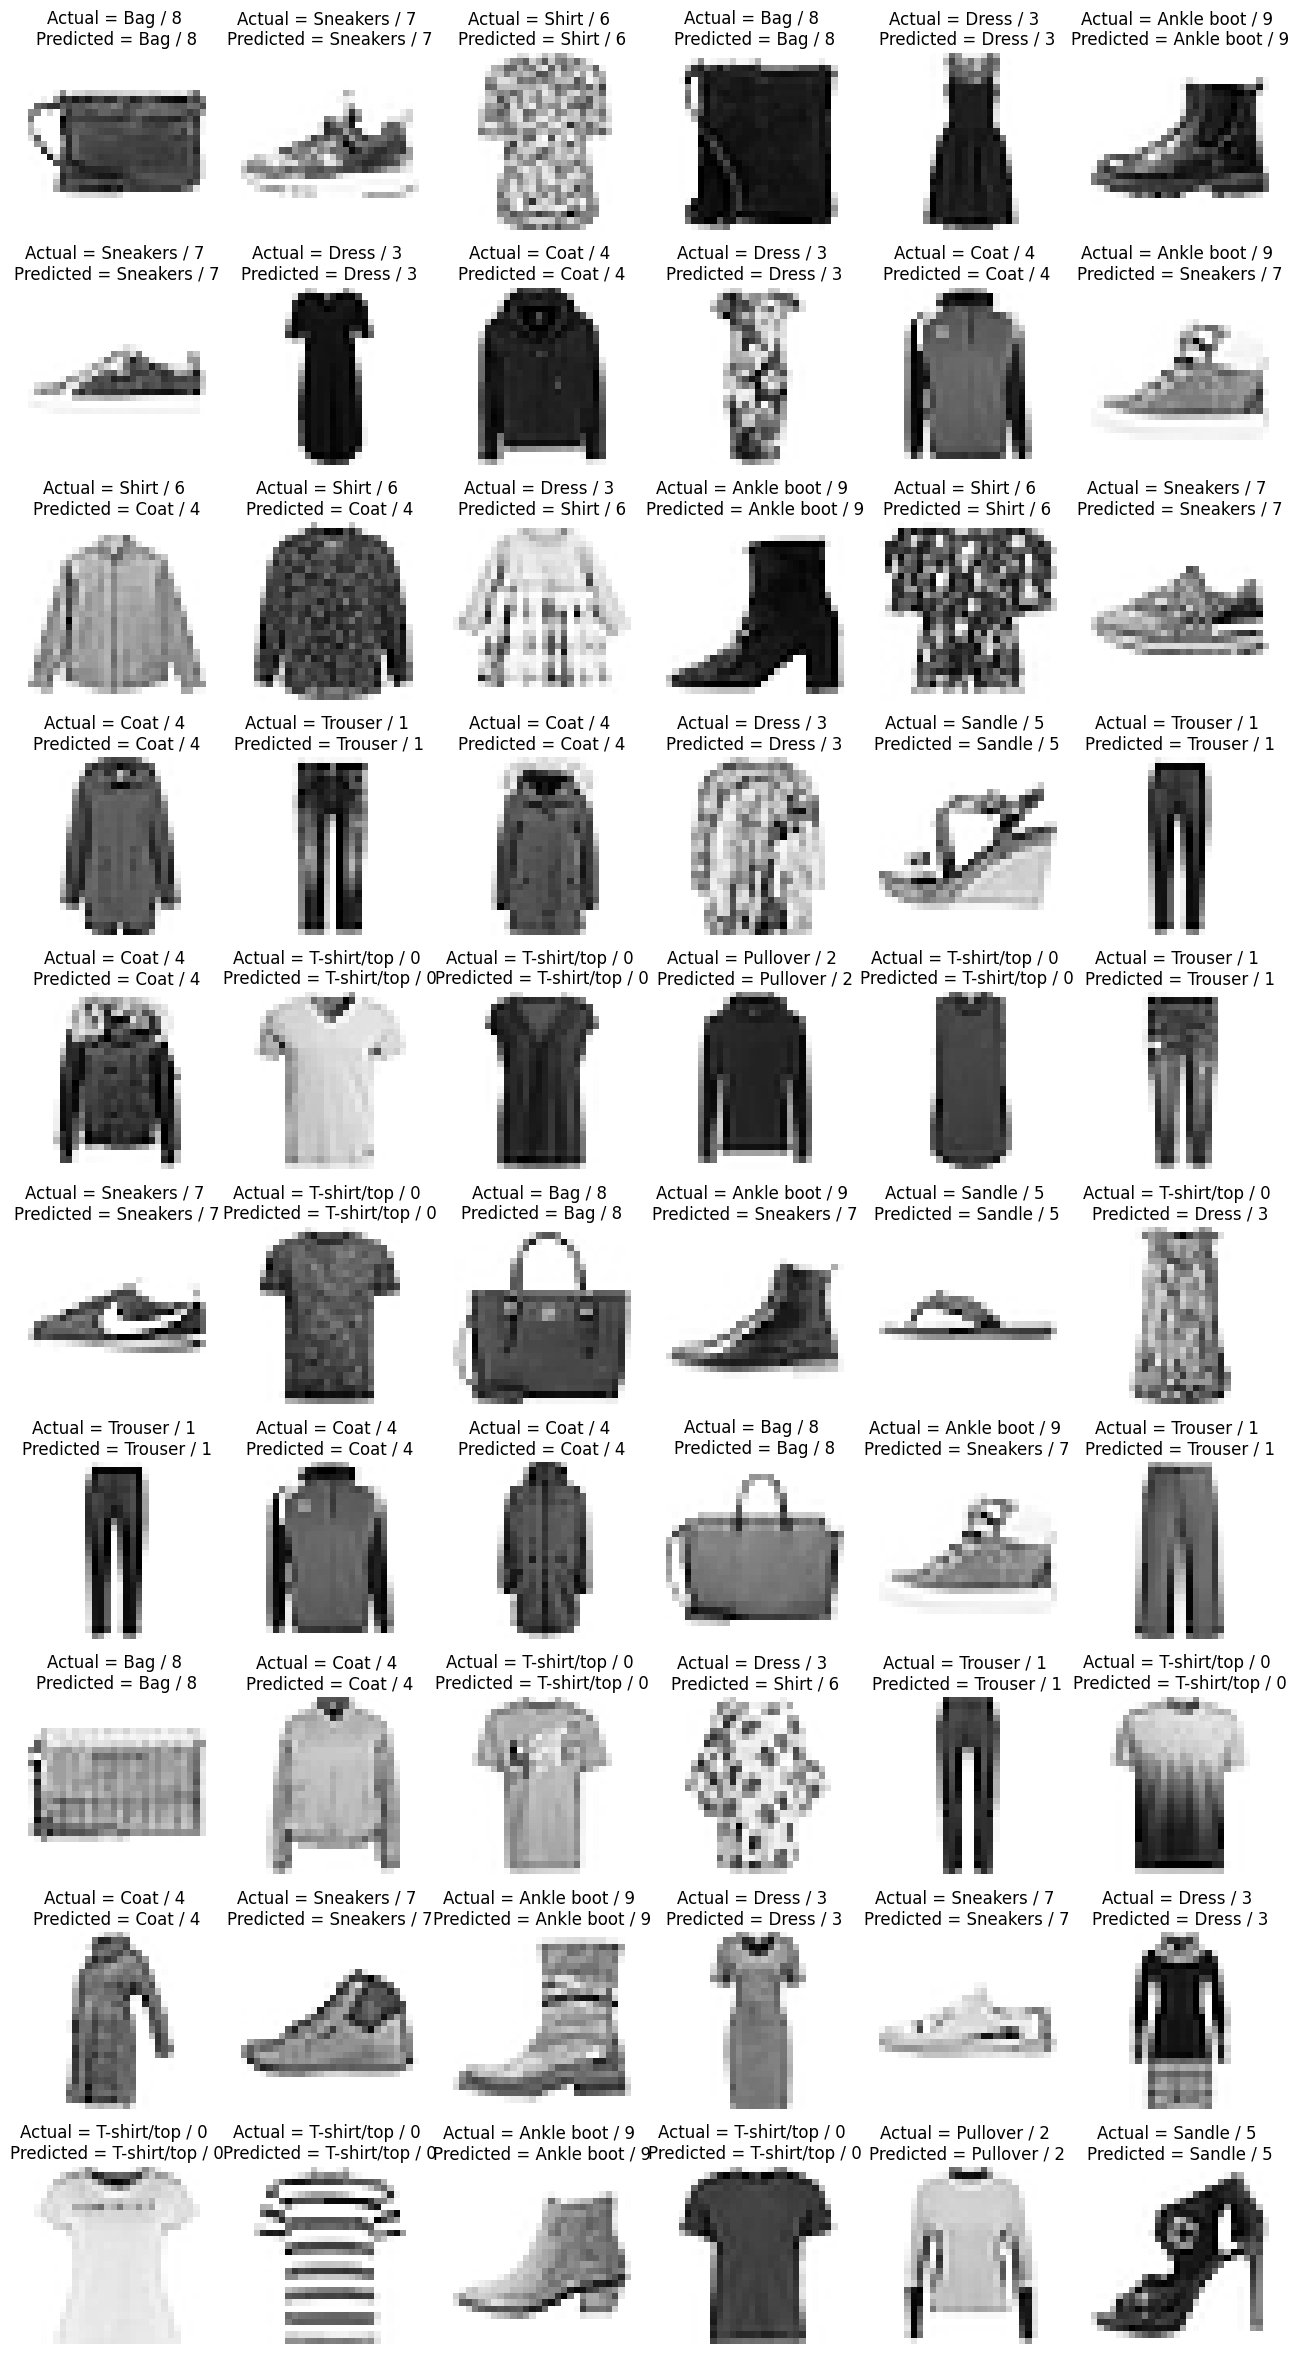

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_lables[y_test[i]], y_test[i], class_lables[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

In [ ]:


from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_lables)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.79      0.91      0.85      1000
      Sandle       0.97      0.98      0.98      1000
       Shirt       0.80      0.66      0.72      1000
    Sneakers       0.92      0.98      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.99      0.92      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_features = model.predict(X_train)
val_features = model.predict(X_Validation)
x_features = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
svm_predictions = svm_model.predict(x_features)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predictions)*100
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 90.95
